In [1]:
import pandas as pd

In [2]:
nba_stats = pd.read_csv('merged_nba_stats.csv')

In [4]:
columns_to_drop = [col for col in nba_stats.columns if "Unnamed" in col or nba_stats[col].isnull().mean() > 0.5]
nba_cleaned = nba_stats.drop(columns=columns_to_drop)

# Select relevant columns for prediction


In [7]:
# Select only numeric columns from the dataset
numeric_data = nba_cleaned.select_dtypes(include=["number"])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix focusing on the target variable `win_ratio` (or `W_x` as an alternative target)
target_variable = "win_ratio" if "win_ratio" in numeric_data.columns else "W_x"
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the correlations with the target variable for analysis

In [9]:
import matplotlib.pyplot as plt
import numpy as np

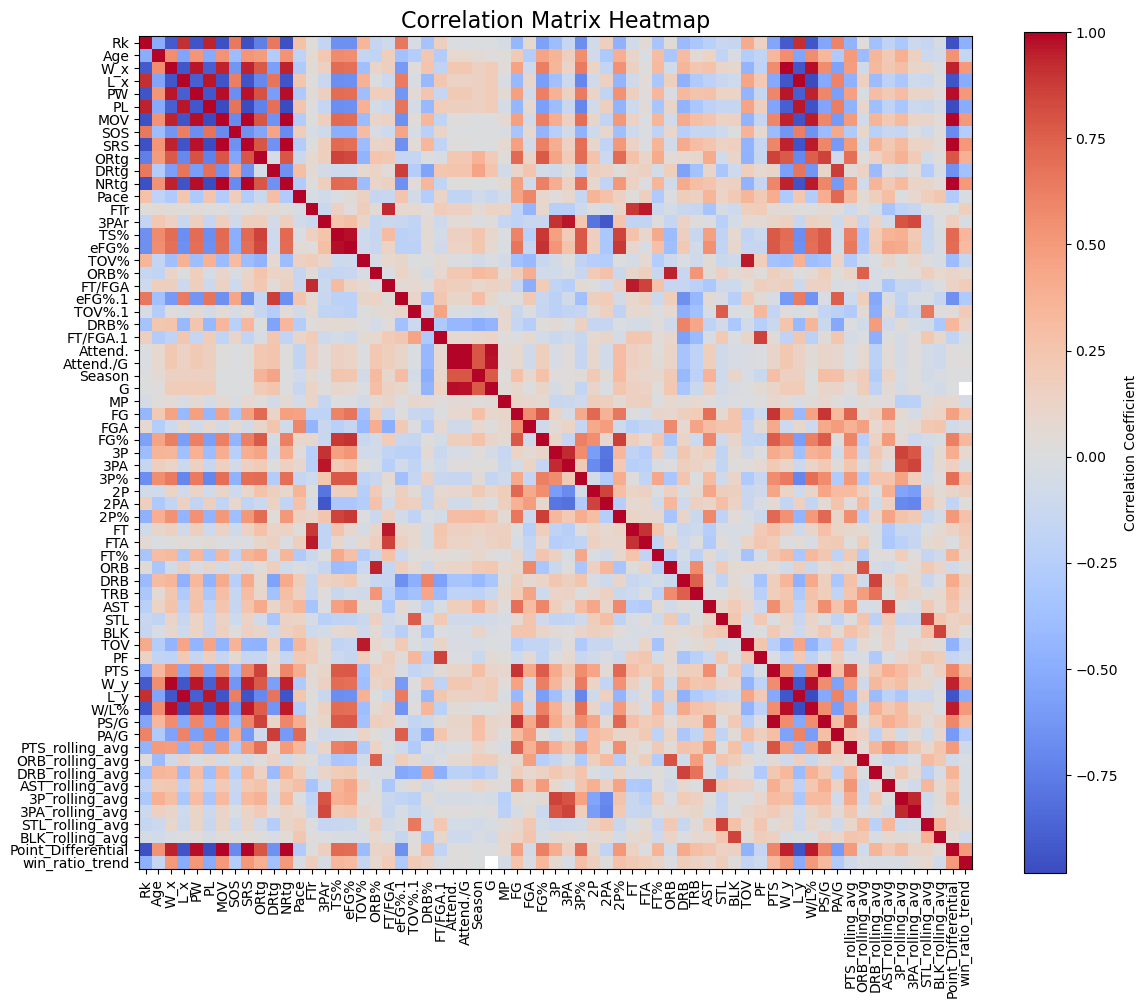

In [10]:
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

# Add labels
ticks = np.arange(len(correlation_matrix.columns))
plt.xticks(ticks, correlation_matrix.columns, rotation=90)
plt.yticks(ticks, correlation_matrix.index)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


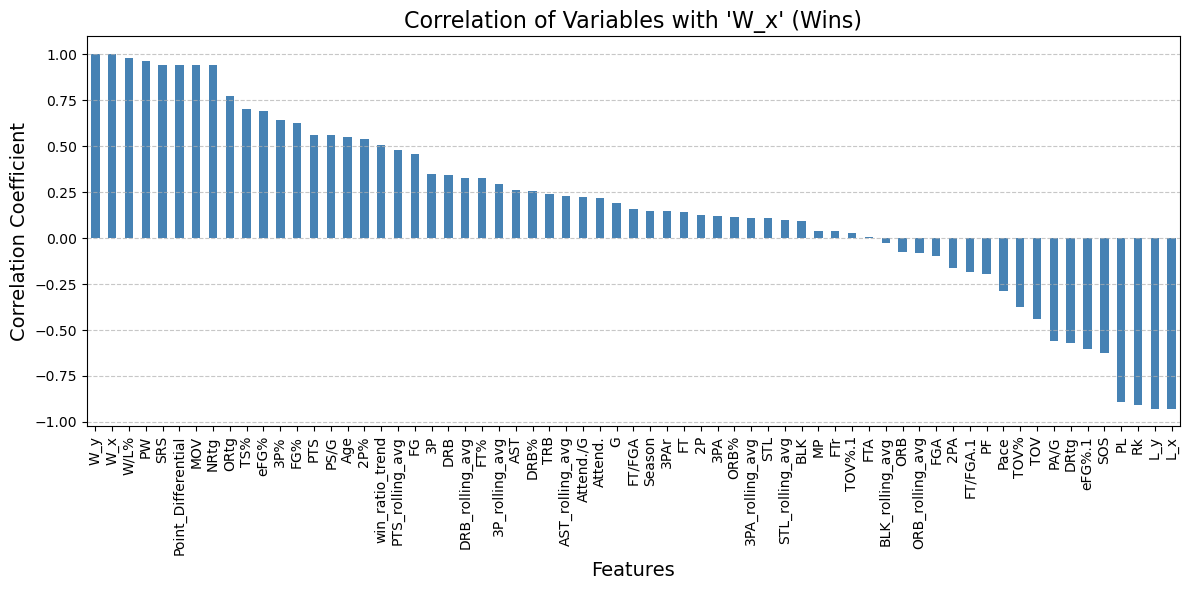

In [11]:
# Compute correlations with the "W_x" (wins) column
correlations_with_wx = numeric_data.corr()["W_x"].sort_values(ascending=False)

# Plot correlations with "W_x"
plt.figure(figsize=(12, 6))
correlations_with_wx.plot(kind="bar", color="steelblue")
plt.title("Correlation of Variables with 'W_x' (Wins)", fontsize=16)
plt.ylabel("Correlation Coefficient", fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


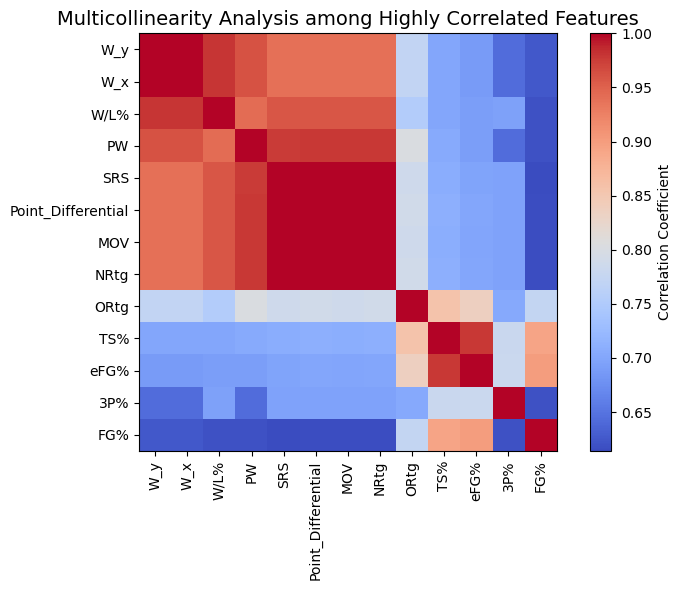

,W_y,W_x,W/L%,PW,SRS,Point_Differential,MOV,NRtg,ORtg,TS%,eFG%,3P%,FG%
W_y,1.000000,1.000000,0.980227,0.962055,0.939493,0.939459,0.939455,0.938657,0.771308,0.700647,0.688570,0.642883,0.625042
W_x,1.000000,1.000000,0.980227,0.962055,0.939493,0.939459,0.939455,0.938657,0.771308,0.700647,0.688570,0.642883,0.625042
W/L%,0.980227,0.980227,1.000000,0.941462,0.959037,0.958785,0.959047,0.958208,0.753476,0.701139,0.692364,0.694652,0.618989
PW,0.962055,0.962055,0.941462,1.000000,0.976418,0.978159,0.977390,0.978113,0.802368,0.705473,0.691200,0.643373,0.619948
SRS,0.939493,0.939493,0.959037,0.976418,1.000000,0.999131,0.999151,0.998981,0.786779,0.708608,0.697571,0.696801,0.614098
Point_Differential,0.939459,0.939459,0.958785,0.978159,0.999131,1.000000,0.999967,0.999810,0.790399,0.711169,0.700260,0.696464,0.616511
MOV,0.939455,0.939455,0.959047,0.977390,0.999151,0.999967,1.000000,0.999841,0.787433,0.709590,0.698758,0.696685,0.616088
NRtg,0.938657,0.938657,0.958208,0.978113,0.998981,0.999810,0.999841,1.000000,0.789746,0.711509,0.700576,0.696721,0.616710
ORtg,0.771308,0.771308,0.753476,0.802368,0.786779,0.790399,0.787433,0.789746,1.000000,0.855426,0.836387,0.703162,0.772395
TS%,0.700647,0.700647,0.701139,0.705473,0.708608,0.711169,0.709590,0.711509,0.855426,1.000000,0.978480,0.781338,0.891488


In [16]:
# Select features strongly correlated with "W_x" (e.g., correlation > 0.7)

ranked_features_df = pd.DataFrame({"Feature": correlations_with_wx.index, "Correlation with W_x": correlations_with_wx.values}).sort_values(by="Correlation with W_x", ascending=False)

highly_correlated_features = ranked_features_df[
    ranked_features_df["Correlation with W_x"] > 0.6
]["Feature"].values

# Compute the pairwise correlation matrix for these features
high_corr_matrix = numeric_data[highly_correlated_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(high_corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
ticks = np.arange(len(high_corr_matrix.columns))
plt.xticks(ticks, high_corr_matrix.columns, rotation=90)
plt.yticks(ticks, high_corr_matrix.index)
plt.title("Multicollinearity Analysis among Highly Correlated Features", fontsize=14)
plt.tight_layout()
plt.show()

high_corr_matrix


In [19]:
features_to_keep = highly_correlated_features[highly_correlated_features != "Point_Differential"]
features_to_keep = features_to_keep[features_to_keep != "MOV"]

# Filter the dataset to retain non-redundant features
filtered_data = numeric_data[features_to_keep]

# Add "W_x" back explicitly for reference in the model
filtered_data["W_x"] = numeric_data["W_x"]



C:\Users\VihangaJ\AppData\Local\Temp\ipykernel_28300\4178579086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["W_x"] = numeric_data["W_x"]


In [ ]:
filtered_data

,W_y,W_x,W/L%,PW,SRS,NRtg,ORtg,TS%,eFG%,3P%,FG%
0,52.0,52.0,0.722,55,8.97,9.3,117.6,0.597,0.563,0.389,0.468
1,47.0,47.0,0.653,49,6.02,6.4,117.6,0.599,0.564,0.411,0.482
2,51.0,51.0,0.708,49,5.67,5.9,117.2,0.597,0.564,0.378,0.490
3,46.0,46.0,0.639,48,5.57,5.8,117.2,0.593,0.566,0.389,0.487
4,49.0,49.0,0.681,48,5.28,5.6,113.2,0.579,0.541,0.374,0.476
...,...,...,...,...,...,...,...,...,...,...,...
119,14.0,14.0,0.171,20,-9.06,-9.1,109.7,0.562,0.526,0.348,0.463
120,15.0,15.0,0.183,20,-9.29,-9.1,110.5,0.567,0.538,0.348,0.470
121,21.0,21.0,0.256,20,-8.29,-9.2,108.3,0.539,0.503,0.345,0.439
122,21.0,21.0,0.256,18,-10.12,-10.5,109.3,0.560,0.529,0.355,0.460


features right now = W/L% , PW, SRS, NRtg, ORtg, TS%, eFG%, 3P%, FG%

possible additional_features = [
    "Pace", "DRtg", "AST_rolling_avg", "STL_rolling_avg", "BLK_rolling_avg",
    "PTS_rolling_avg", "PA/G", "3PA"
]


In [22]:
# Additional features to analyze
additional_features = [
    "Pace", "DRtg", "AST_rolling_avg", "STL_rolling_avg", "BLK_rolling_avg",
    "PTS_rolling_avg", "PA/G", "3PA"
]

# Ensure these features exist in the dataset
valid_additional_features = [feature for feature in additional_features if feature in nba_stats.columns]

# Include these features along with the original target (e.g., W/L%) for correlation analysis
numeric_data = nba_stats.select_dtypes(include=["number"])
correlation_matrix = numeric_data[valid_additional_features + ["W/L%"]].corr()

# Extract correlations of these additional features with W/L%
correlation_with_target = correlation_matrix["W/L%"].sort_values(ascending=False)

correlation_with_target

W/L%               1.000000
PTS_rolling_avg    0.492840
AST_rolling_avg    0.220475
3PA                0.116781
STL_rolling_avg    0.100380
BLK_rolling_avg   -0.016559
Pace              -0.266531
PA/G              -0.587488
DRtg              -0.626947
Name: W/L%, dtype: float64

Feature variables chosen = W/L% , PW, SRS, NRtg, ORtg, TS%, eFG%, 3P%, FG%, PA/G, DRtg, PTS_rolling_avg

In [24]:
Features = ["W/L%", "PW", "SRS", "NRtg", "ORtg", "TS%", "DRtg", "PA/G", "eFG%", "3P%","FG%"]

# Filter the dataset for the recommended features
filtered_data = nba_stats[Features]

In [25]:
filtered_data

,W/L%,PW,SRS,NRtg,ORtg,TS%,DRtg,PA/G,eFG%,3P%,FG%
0,0.722,55,8.97,9.3,117.6,0.597,108.3,107.2,0.563,0.389,0.468
1,0.653,49,6.02,6.4,117.6,0.599,111.2,107.8,0.564,0.411,0.482
2,0.708,49,5.67,5.9,117.2,0.597,111.3,109.5,0.564,0.378,0.490
3,0.639,48,5.57,5.8,117.2,0.593,111.4,114.2,0.566,0.389,0.487
4,0.681,48,5.28,5.6,113.2,0.579,107.6,108.1,0.541,0.374,0.476
...,...,...,...,...,...,...,...,...,...,...,...
119,0.171,20,-9.06,-9.1,109.7,0.562,118.8,119.0,0.526,0.348,0.463
120,0.183,20,-9.29,-9.1,110.5,0.567,119.6,123.0,0.538,0.348,0.470
121,0.256,20,-8.29,-9.2,108.3,0.539,117.5,115.4,0.503,0.345,0.439
122,0.256,18,-10.12,-10.5,109.3,0.560,119.8,116.8,0.529,0.355,0.460


In [26]:
filtered_data.to_csv("Featured_data.csv")

Cleaning and applying for 2025 dataset

In [3]:
nba_stats_2025 = pd.read_csv("merged_nba_stats_2025.csv")

columns_to_drop = [col for col in nba_stats_2025.columns if "Unnamed" in col or nba_stats_2025[col].isnull().mean() > 0.5]
nba_cleaned = nba_stats_2025.drop(columns=columns_to_drop)

In [4]:
Features_2025 = ["Team","W/L%", "PW", "SRS", "NRtg", "ORtg", "TS%", "DRtg", "PA/G", "eFG%", "3P%","FG%"]

# Filter the dataset for the recommended features
filtered_data_2025 = nba_stats_2025[Features_2025]

In [5]:
filtered_data_2025.to_csv("Featured_data_2025.csv")